### match a given input pattern using euclidean distance

In [57]:
import math

def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

def main():
    n = int(input("Enter number of stored patterns: "))
    m = int(input("Enter number of elements in each pattern: "))
    
    stored_patterns = []
    print("Enter stored patterns:")
    for i in range(n):
        pattern = list(map(float, input(f"Pattern {i+1}: ").split()))
        if len(pattern) != m:
            print("Error: Pattern length mismatch!")
            return
        stored_patterns.append(pattern)

    input_pattern = list(map(float, input("Enter input pattern: ").split()))
    if len(input_pattern) != m:
        print("Error: Input pattern length mismatch!")
        return

    distances = []
    for i, pattern in enumerate(stored_patterns):
        dist = euclidean_distance(pattern, input_pattern)
        distances.append(dist)
        print(f"Euclidean distance from Pattern {i+1}: {dist:.4f}")

    min_index = distances.index(min(distances))
    matched_pattern = stored_patterns[min_index]
    
    print("\nMatched Pattern:", matched_pattern)
    print("Matched Template: Pattern", min_index + 1)

if __name__ == "__main__":
    main()

Enter number of stored patterns:  3
Enter number of elements in each pattern:  4


Enter stored patterns:


Pattern 1:  1 1 1 1
Pattern 2:  1 1 0 1
Pattern 3:  1 0 0 1
Enter input pattern:  1 1 1 1


Euclidean distance from Pattern 1: 0.0000
Euclidean distance from Pattern 2: 1.0000
Euclidean distance from Pattern 3: 1.4142

Matched Pattern: [1.0, 1.0, 1.0, 1.0]
Matched Template: Pattern 1


### Mahalnobis_distance using Polygons

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

In [47]:
def compute_mahalanobis_distance_between_polygons(polygon1, polygon2):

    poly1_array = np.array(polygon1)
    poly2_array = np.array(polygon2)

    centroid1 = np.mean(poly1_array, axis=0)
    centroid2 = np.mean(poly2_array, axis=0)


    combined_points = np.vstack((poly1_array, poly2_array))
    covariance_matrix = np.cov(combined_points.T)


    inv_cov_matrix = np.linalg.inv(covariance_matrix)
    distance = mahalanobis(centroid1, centroid2, inv_cov_matrix)

    return distance, centroid1, centroid2, poly1_array, poly2_array


In [59]:
def plot_polygons(polygon1, polygon2, centroid1, centroid2, distance):
    plt.figure(figsize=(8, 6))

    # Plot Polygon 1
    poly1 = np.array(polygon1)
    plt.fill(poly1[:, 0], poly1[:, 1], alpha=0.4, color='blue', label='Polygon 1')

    # Plot Polygon 2
    poly2 = np.array(polygon2)
    plt.fill(poly2[:, 0], poly2[:, 1], alpha=0.4, color='green', label='Polygon 2')

    # Plot centroids
    plt.scatter(*centroid1, color='red', marker='x', s=100, label='Centroid 1')
    plt.scatter(*centroid2, color='orange', marker='x', s=100, label='Centroid 2')

    plt.plot([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]],
             'k--', label=f'Mahalanobis Distance = {distance:.4f}')

    plt.legend()
    plt.title("Polygons and Mahalanobis Distance Between Centroids")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()


Enter the coordinates of Polygon 1 (e.g., x1 y1, x2 y2, ...):


Coordinates:  0 0,1 0,1 1,0 1


Enter the coordinates of Polygon 2 (e.g., x1 y1, x2 y2, ...):


Coordinates:  3 3,4 3,4 4,3 4


Mahalanobis Distance between the polygons: 1.8209


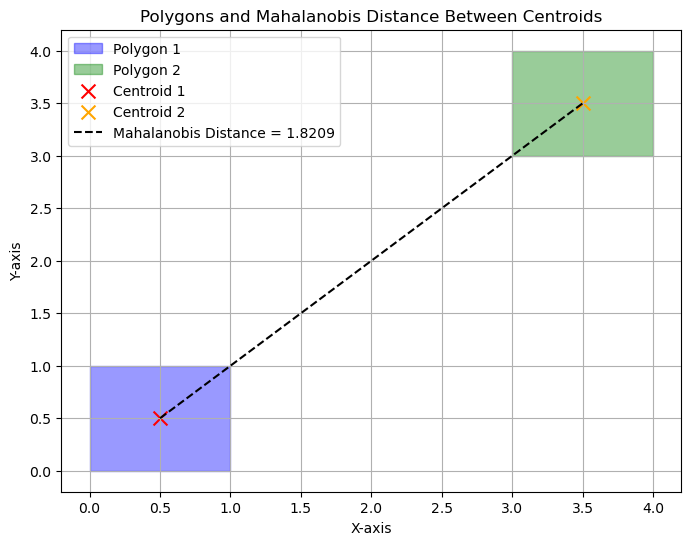

In [53]:
if __name__ == "__main__":
    def get_polygon_input(polygon_num):
        print(f"Enter the coordinates of Polygon {polygon_num} (e.g., x1 y1, x2 y2, ...):")
        points = input("Coordinates: ").strip().split(",")
        polygon = [tuple(map(float, point.strip().split())) for point in points]
        return polygon

    try:
        polygon1 = get_polygon_input(1)
        polygon2 = get_polygon_input(2)

        # Compute the Mahalanobis Distance
        distance, centroid1, centroid2, poly1_array, poly2_array = compute_mahalanobis_distance_between_polygons(polygon1, polygon2)
        print(f"Mahalanobis Distance between the polygons: {distance:.4f}")

        plot_polygons(polygon1, polygon2, centroid1, centroid2, distance)

    except ValueError as e:
        print(e)
    except Exception as e:
        print(f"An error occurred: {e}")

### Write a program to compute Shannon Entropy of the given data

In [3]:
# use titanic.csv
#show available columns enter a particular column show invalid if wrong data, show value statistics of the column : count probabaity and shannon entropy

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
print("Available Columns:", df.columns.tolist())

Available Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [32]:
col = input("Enter column name: ")

if col not in df.columns:
    print("Invalid column")
else:
    print(f"Analyzing column: {col}")


counts = df[col].value_counts()


probs = counts / counts.sum()


entropy = -(probs * np.log2(probs)).sum()

print("Counts:\n", counts)
print("\nProbabilities:\n", probs)
print(f"\nShannon Entropy: {entropy:.4f}")

Enter column name:  Sex


Analyzing column: Sex
Counts:
 Sex
male      577
female    314
Name: count, dtype: int64

Probabilities:
 Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

Shannon Entropy: 0.9362


### compute supervised and unsupervised learning of image dataset

C:\Users\Student\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training supervised CNN model...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2862 - loss: 1.9228 - val_accuracy: 0.4930 - val_loss: 1.4520
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4750 - loss: 1.4422 - val_accuracy: 0.5667 - val_loss: 1.2060
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5410 - loss: 1.2872 - val_accuracy: 0.6024 - val_loss: 1.1333
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5825 - loss: 1.1818 - val_accuracy: 0.6335 - val_loss: 1.0426
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6067 - loss: 1.1047 - val_accuracy: 0.6272 - val_loss: 1.0569
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6279 - loss: 1.0579 - val_accuracy: 0.6574 - val_loss: 0.9753
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6493 - loss: 0.9996 - val_accuracy: 0.6688 - val_loss: 0.9370
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy:

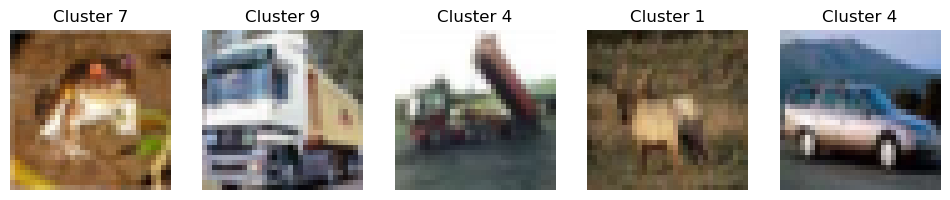

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# -------------------------------
# Load CIFAR-10 dataset (inbuilt)
# -------------------------------
(X, y), (X_test, y_test) = cifar10.load_data()

# Normalize images
X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten labels
y = y.flatten()
y_test = y_test.flatten()

# Class names for CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Split training further (train/val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding for supervised learning
y_train_cat = to_categorical(y_train, num_classes=len(class_names))
y_val_cat = to_categorical(y_val, num_classes=len(class_names))
y_test_cat = to_categorical(y_test, num_classes=len(class_names))

# -------------------------------
# Supervised Learning (CNN)
# -------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training supervised CNN model...")
model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_val, y_val_cat), batch_size=64)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Supervised Test Accuracy: {test_acc:.2f}")

# -------------------------------
# Unsupervised Learning (KMeans)
# -------------------------------
# Flatten images for clustering
X_flattened = X.reshape(X.shape[0], -1)

# Apply K-Means clustering
k = len(class_names)  # 10 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_flattened)

# -------------------------------
# Visualization of clusters
# -------------------------------
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X[i])
    ax.set_title(f"Cluster {cluster_labels[i]}")
    ax.axis('off')
plt.show()

In [20]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# -------------------------------
# Clustering Evaluation Metrics
# -------------------------------

# ARI: compares clustering with ground truth labels
ari = adjusted_rand_score(y, cluster_labels)

# NMI: measures mutual information between clustering and true labels
nmi = normalized_mutual_info_score(y, cluster_labels)

# Silhouette Score: measures cohesion vs separation (requires features, not labels)
silhouette = silhouette_score(X_flattened, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Adjusted Rand Index (ARI): 0.0418
Normalized Mutual Information (NMI): 0.0790
Silhouette Score: 0.0506


### program to implement Bayesian classifier a) from scratch (no ML library) b) using scikit-learn

ck likelihood using gaussian for iris dataset display confusion matrix, classification report and learned model parameters for all 3 classes

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

iris = load_iris()
X = iris.data
y = iris.target
class_labels = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


priors = []
means = []
variances = []

for c in np.unique(y_train):
    X_c = X_train[y_train == c]
    priors.append(len(X_c) / len(X_train))
    means.append(X_c.mean(axis=0))
    variances.append(X_c.var(axis=0))

priors = np.array(priors)
means = np.array(means)
variances = np.array(variances)


def gaussian_likelihood(x, mean, var):
    coeff = 1.0 / np.sqrt(2.0 * np.pi * var)
    exponent = np.exp(- (x - mean) ** 2 / (2 * var))
    return coeff * exponent


def predict(X):
    y_pred = []
    for x in X:
        posteriors = []
        for idx, c in enumerate(np.unique(y_train)):
            likelihoods = gaussian_likelihood(x, means[idx], variances[idx])
            posterior = np.log(priors[idx]) + np.sum(np.log(likelihoods))
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)


y_pred = predict(X_test)
print("Confusion Matrix (Scratch):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report (Scratch):\n", classification_report(y_test, y_pred, target_names=class_labels))

print("\nLearned Parameters:")
for idx, label in enumerate(class_labels):
    print(f"Class {label}: Prior={priors[idx]:.3f}, Mean={means[idx]}, Var={variances[idx]}")

Confusion Matrix (Scratch):
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report (Scratch):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Learned Parameters:
Class setosa: Prior=0.295, Mean=[4.96451613 3.37741935 1.46451613 0.2483871 ], Var=[0.1119667  0.13658689 0.03325702 0.01152966]
Class versicolor: Prior=0.352, Mean=[5.86216216 2.72432432 4.21081081 1.3027027 ], Var=[0.27532505 0.08724617 0.23934259 0.04134405]
Class virginica: Prior=0.352, Mean=[6.55945946 2.98648649 5.54594595 2.00540541], Var=[0.42241052 0.09630387 0.28842951 0.08591673]


In [13]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred_sklearn = gnb.predict(X_test)


print("Confusion Matrix (Scikit-learn):\n", confusion_matrix(y_test, y_pred_sklearn))
print("\nClassification Report (Scikit-learn):\n", classification_report(y_test, y_pred_sklearn, target_names=class_labels))

print("\nLearned Parameters (Scikit-learn):")
print("Class Priors:", gnb.class_prior_)
print("Means:\n", gnb.theta_)
print("Variances:\n", gnb.var_)

Confusion Matrix (Scikit-learn):
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report (Scikit-learn):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Learned Parameters (Scikit-learn):
Class Priors: [0.2952381  0.35238095 0.35238095]
Means:
 [[4.96451613 3.37741935 1.46451613 0.2483871 ]
 [5.86216216 2.72432432 4.21081081 1.3027027 ]
 [6.55945946 2.98648649 5.54594595 2.00540541]]
Variances:
 [[0.1119667  0.13658689 0.03325703 0.01152966]
 [0.27532506 0.08724617 0.23934259 0.04134405]
 [0.42241052 0.09630387 0.28842951 0.08591673]]


### Write a Program for Hopfield Neural Network.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        """Train the network using Hebbian learning rule"""
        for p in patterns:
            p = p.reshape(self.size, 1)
            self.weights += np.dot(p, p.T)
        np.fill_diagonal(self.weights, 0)  # No self-connections

    def recall(self, pattern, steps=5):
        """Recall pattern using asynchronous update"""
        pattern = pattern.copy()
        for _ in range(steps):
            for i in range(self.size):
                raw_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if raw_input >= 0 else -1
        return pattern

def print_pattern(p, shape):
    """Helper function to print pattern as grid"""
    p = p.reshape(shape)
    for row in p:
        print(''.join(['█' if val == 1 else ' ' for val in row]))
    print()

# Example patterns (5x5 grid)
pattern_A = np.array([
    -1,  1,  1,  1, -1,
     1, -1, -1, -1,  1,
     1,  1,  1,  1,  1,
     1, -1, -1, -1,  1,
     1, -1, -1, -1,  1
])

pattern_B = np.array([
     1,  1,  1,  1, -1,
     1, -1, -1, -1,  1,
     1,  1,  1,  1, -1,
     1, -1, -1, -1,  1,
     1,  1,  1,  1, -1
])

# Initialize and train network
hopfield = HopfieldNetwork(size=25)
hopfield.train([pattern_A, pattern_B])

# Distorted input
test_pattern = pattern_A.copy()
test_pattern[0] = -1  # Flip a bit
test_pattern[12] = -1

print("Input pattern:")
print_pattern(test_pattern, (5, 5))

# Recall
output_pattern = hopfield.recall(test_pattern, steps=10)

print("Recalled pattern:")
print_pattern(output_pattern, (5, 5))

Input pattern:
 ███ 
█   █
██ ██
█   █
█   █

Recalled pattern:
 ███ 
█   █
█████
█   █
█   █



#### random dataset of choice

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        """Train the network using Hebbian learning rule"""
        for p in patterns:
            p = p.reshape(self.size, 1)
            self.weights += np.dot(p, p.T)
        np.fill_diagonal(self.weights, 0)  # No self-connections

    def recall(self, pattern, steps=5):
        """Recall pattern using asynchronous update"""
        pattern = pattern.copy()
        for _ in range(steps):
            for i in range(self.size):
                raw_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if raw_input >= 0 else -1
        return pattern

def print_pattern(p, shape):
    """Helper function to print pattern as grid"""
    p = p.reshape(shape)
    for row in p:
        print(''.join(['█' if val == 1 else ' ' for val in row]))
    print()

# ---- Generate random dataset ----
np.random.seed(42)  # for reproducibility
num_patterns = 3
pattern_size = 25  # 5x5 grid

# Random patterns with values ±1
patterns = [np.random.choice([-1, 1], size=pattern_size) for _ in range(num_patterns)]

# Initialize and train network
hopfield = HopfieldNetwork(size=pattern_size)
hopfield.train(patterns)

# Pick one pattern and distort it
test_pattern = patterns[0].copy()
flip_indices = np.random.choice(pattern_size, size=5, replace=False)
test_pattern[flip_indices] *= -1  # flip 5 bits

print("Input (distorted) pattern:")
print_pattern(test_pattern, (5, 5))

# Recall
output_pattern = hopfield.recall(test_pattern, steps=10)

print("Recalled pattern:")
print_pattern(output_pattern, (5, 5))

Input (distorted) pattern:
 █  █
█   █
  █ █
██ █ 
█████

Recalled pattern:
 █   
██   
    █
██ █ 
█ ██ 



### ANN facial recognition

Male images: 4372
Female images: 5407
Found 7824 images belonging to 2 classes.
Found 1955 images belonging to 2 classes.
Train samples: 7824
Validation samples: 1955
Epoch 1/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 55s 189ms/step - accuracy: 0.6171 - loss: 0.6510 - val_accuracy: 0.6634 - val_loss: 0.5985
Epoch 2/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 45s 185ms/step - accuracy: 0.7842 - loss: 0.4572 - val_accuracy: 0.7013 - val_loss: 0.5415
Epoch 3/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 45s 185ms/step - accuracy: 0.8318 - loss: 0.3628 - val_accuracy: 0.6849 - val_loss: 0.5823
Epoch 4/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 48s 194ms/step - accuracy: 0.8498 - loss: 0.3299 - val_accuracy: 0.7146 - val_loss: 0.5310
Epoch 5/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 48s 194ms/step - accuracy: 0.8676 - loss: 0.2958 - val_accuracy: 0.6900 - val_loss: 0.5916
Epoch 6/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 52s 212ms/step - accuracy: 0.8818 - loss: 0.2661 - val_accuracy: 0.6997 - val_loss: 0.5936
Epoch 7/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 56s 228

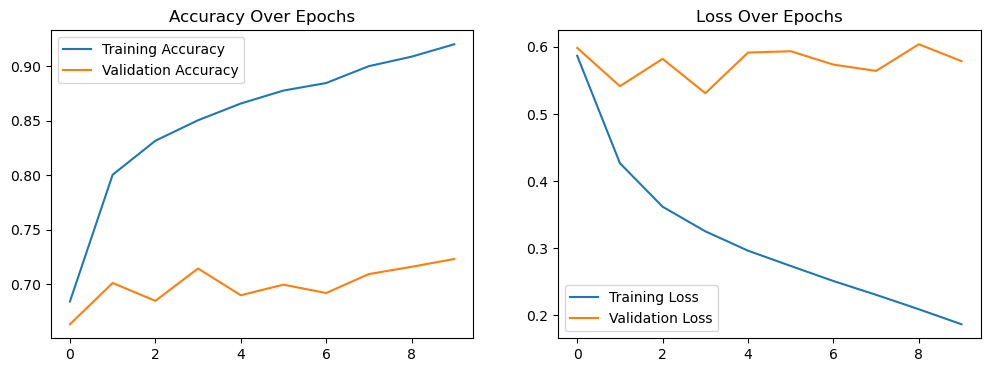

62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.7228 - loss: 0.5760

Test accuracy: 0.72


In [29]:
import os
import shutil
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Organize dataset
# -----------------------------
# Path to UTKFace crop_part1 folder
utkface_dir = r"C:\Users\Student\Desktop\rohan\UTK\crop_part1"

# New organized dataset folder
data_dir = "utkface_gender_split"
male_dir = os.path.join(data_dir, "male")
female_dir = os.path.join(data_dir, "female")

os.makedirs(male_dir, exist_ok=True)
os.makedirs(female_dir, exist_ok=True)

# Parse filenames and copy images into male/female folders
for filename in os.listdir(utkface_dir):
    if filename.endswith(".jpg") or filename.endswith(".chip.jpg"):
        parts = filename.split("_")
        if len(parts) >= 2:
            try:
                gender = int(parts[1])  # gender is the 2nd field
                src = os.path.join(utkface_dir, filename)
                if gender == 0:
                    shutil.copy(src, os.path.join(male_dir, filename))
                elif gender == 1:
                    shutil.copy(src, os.path.join(female_dir, filename))
            except Exception as e:
                print("Skipping file:", filename, "Error:", e)

# -----------------------------
# Step 2: Verify dataset counts
# -----------------------------
print("Male images:", len(glob.glob(os.path.join(male_dir, "*.jpg"))))
print("Female images:", len(glob.glob(os.path.join(female_dir, "*.jpg"))))

# -----------------------------
# Step 3: Data preprocessing
# -----------------------------
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

print("Train samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)

# -----------------------------
# Step 4: Build CNN model
# -----------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# Step 5: Train model
# -----------------------------
epochs = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# -----------------------------
# Step 6: Plot training history
# -----------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()

# -----------------------------
# Step 7: Evaluate model
# -----------------------------
test_loss, test_acc = model.evaluate(validation_generator)
print(f"\nTest accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Random image: utkface_gender_split\female\20_1_0_20170103175638671.jpg.chip.jpg
Predicted gender: Female (score=0.0567)


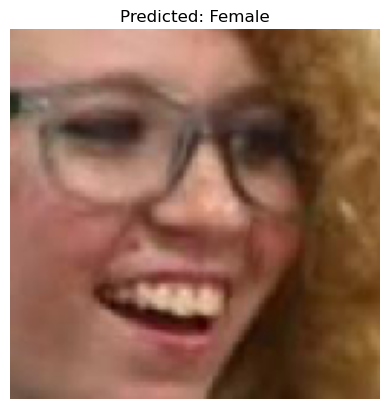

In [47]:
import random
import numpy as np
from tensorflow.keras.preprocessing import image

# -----------------------------
# Step 8: Test on a random image
# -----------------------------
# Pick a random image from either male or female folder
all_images = glob.glob(os.path.join(male_dir, "*.jpg")) + glob.glob(os.path.join(female_dir, "*.jpg"))
random_image_path = random.choice(all_images)

# Load and preprocess the image
img = image.load_img(random_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # rescale like training

# Predict
prediction = model.predict(img_array)[0][0]

# Interpret result
label = "Female" if prediction < 0.5 else "Male"

print(f"Random image: {random_image_path}")
print(f"Predicted gender: {label} (score={prediction:.4f})")

# Optionally display the image
plt.imshow(img)
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()